In [ ]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# File paths and Tensorflow
import os
import tensorflow as tf

# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Random forest model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

# Keras
from tensorflow import keras
# from tensorflow.keras

In [ ]:
# Read in the liver_clean.csv

url = "https://raw.githubusercontent.com/amydohlin/project-4-group-2/main/cleaned_csvs/liver_clean.csv"

liver_clean_df = pd.read_csv(url)
liver_clean_df

,Unnamed: 0,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.000000,598.000000,52.700000,57.000000,256.0,9.9,1
1,1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.0,10.8,2
2,2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.0,10.0,2
3,3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.0,10.2,2
4,4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9634,24963,3577,C,Placebo,17897,F,Y,N,Y,N,0.7,369.510563,3.49,97.648387,1982.655769,122.556346,124.702128,243.0,9.7,1
9635,24971,4795,C,Placebo,23376,F,Y,N,Y,N,1.8,369.510563,3.24,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,1
9636,24972,3358,D,D-penicillamine,24585,F,N,Y,N,N,2.1,262.000000,3.48,58.000000,2045.000000,89.900000,84.000000,412.0,11.8,3
9637,24991,4365,C,D-penicillamine,21324,F,N,N,N,N,0.9,346.000000,3.40,81.000000,1098.000000,122.450000,90.000000,228.0,10.3,2


Random Forest Model

*   Robust against overfitting
*   Robust to outliers and non-linear data
*   Efficient on large databases


In [ ]:
#separate the features from the target variable (Stage)
y = liver_clean_df['Stage']

X = liver_clean_df.drop(["Unnamed: 0", "Stage"], axis=1)

#preview the features data
X.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5


In [ ]:
#overview of some of the categorical columns: if only Y & N as options, can convert to "1" and "0"
print(X["Spiders"].value_counts())
print(X["Ascites"].value_counts())
print(X["Hepatomegaly"].value_counts())
print(X["Edema"].value_counts())
print(X["Drug"].value_counts())

Spiders
N    4960
Y    4679
Name: count, dtype: int64
Ascites
N    6329
Y    3310
Name: count, dtype: int64
Hepatomegaly
N    5904
Y    3735
Name: count, dtype: int64
Edema
N    8055
S    1227
Y     357
Name: count, dtype: int64
Drug
Placebo            6212
D-penicillamine    3427
Name: count, dtype: int64


In [ ]:
#Edema has "S" as a third option, will convert to numerical with "get dummies" later on
#replace categorical values in Ascites, Hepatomegaly, Spiders, Drug columns with numerical values: {"Y": 1, "N": 0", D-penicillamine": 1, "Placebo": 0}
X[["Ascites", "Hepatomegaly", "Spiders", "Drug"]] = X[["Ascites", "Hepatomegaly", "Spiders", "Drug"]].replace({"Y": 1, "N": 0, "D-penicillamine": 1, "Placebo": 0}).astype(int)

#preview features data
X.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2221,C,0,18499,F,0,1,0,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9
1,1230,C,0,19724,M,1,0,1,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8
2,4184,C,0,11839,F,0,0,0,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0
3,2090,D,0,16467,F,0,0,0,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2
4,2105,D,0,21699,F,0,1,0,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5


In [ ]:
# Encode the remaining categorical variables (Status, Drug) using get_dummies
X = pd.get_dummies(X, dtype=int)

#preview dataset with categorical data converted
X.head()

,N_Days,Drug,Age,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,...,Platelets,Prothrombin,Status_C,Status_CL,Status_D,Sex_F,Sex_M,Edema_N,Edema_S,Edema_Y
0,2221,0,18499,0,1,0,0.5,149.0,4.04,227.0,...,256.0,9.9,1,0,0,1,0,1,0,0
1,1230,0,19724,1,0,1,0.5,219.0,3.93,22.0,...,220.0,10.8,1,0,0,0,1,1,0,0
2,4184,0,11839,0,0,0,0.5,320.0,3.54,51.0,...,225.0,10.0,1,0,0,1,0,1,0,0
3,2090,0,16467,0,0,0,0.7,255.0,3.74,23.0,...,151.0,10.2,0,0,1,1,0,1,0,0
4,2105,0,21699,0,1,0,1.9,486.0,3.54,74.0,...,151.0,11.5,0,0,1,1,0,1,0,0


In [ ]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#create and fit a StandardScaler instance
X_scaler = StandardScaler().fit(X_train)

#scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
#create a random forest classifier
rf_model = RandomForestClassifier(n_estimators = 500, random_state=42)

# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# make predictions using the testing data
rf_predictions = rf_model.predict(X_test_scaled)

Accuracy Score : 0.8680497925311204
Classification Report
              precision    recall  f1-score   support

           1       0.87      0.86      0.86       769
           2       0.83      0.83      0.83       798
           3       0.91      0.91      0.91       843

    accuracy                           0.87      2410
   macro avg       0.87      0.87      0.87      2410
weighted avg       0.87      0.87      0.87      2410



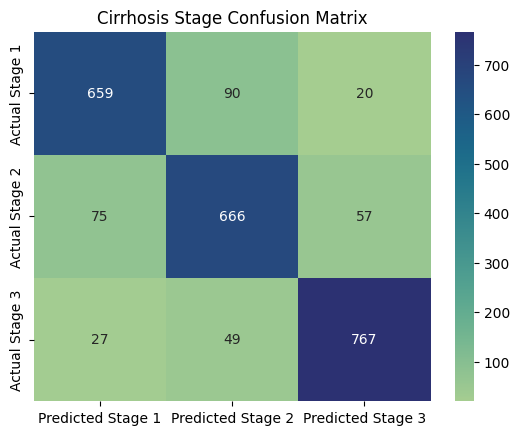

In [ ]:
# Evaluate the random forest model
# Calculate the confusion matrix
c_matrix = confusion_matrix(y_test, rf_predictions)
c_matrix_df = pd.DataFrame(
    c_matrix, index=["Actual Stage 1", "Actual Stage 2", "Actual Stage 3"], columns=["Predicted Stage 1", "Predicted Stage 2", "Predicted Stage 3"]
)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, rf_predictions)

#Display classification report
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, rf_predictions))

# Display confusion matrix
# seaborn heatmap documentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(c_matrix_df, cmap="crest", annot=True, fmt='g')
plt.title("Cirrhosis Stage Confusion Matrix")
plt.show()

<Axes: title={'center': 'Feature Importances'}, ylabel='Features'>

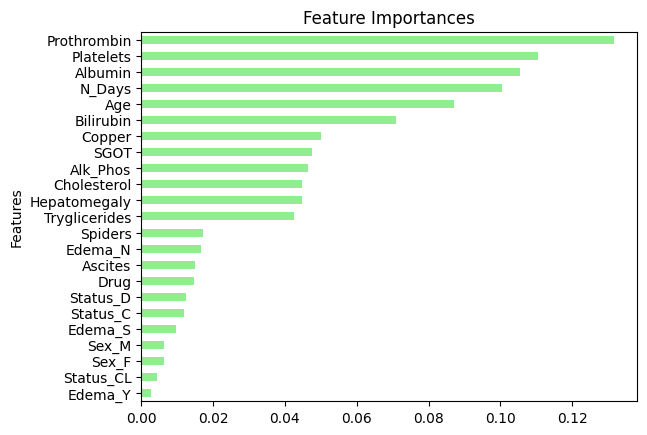

In [ ]:
#evaluate importance of the input features
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns),reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Feature Importances', ylabel= 'Features', legend=False)

In [ ]:
importances_df.head()

,Feature Importances
1,
Prothrombin,0.131547
Platelets,0.110504
Albumin,0.105550
N_Days,0.100413
Age,0.087133
